<a href="https://colab.research.google.com/github/shivambharucha/ML/blob/main/Diabetes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

print("First 5 Rows:\n", df.head())

print("\nMissing Values:\n", df.isnull().sum())

print("\nDataset Summary:\n", df.describe())


First 5 Rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Missing Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dataset Summa

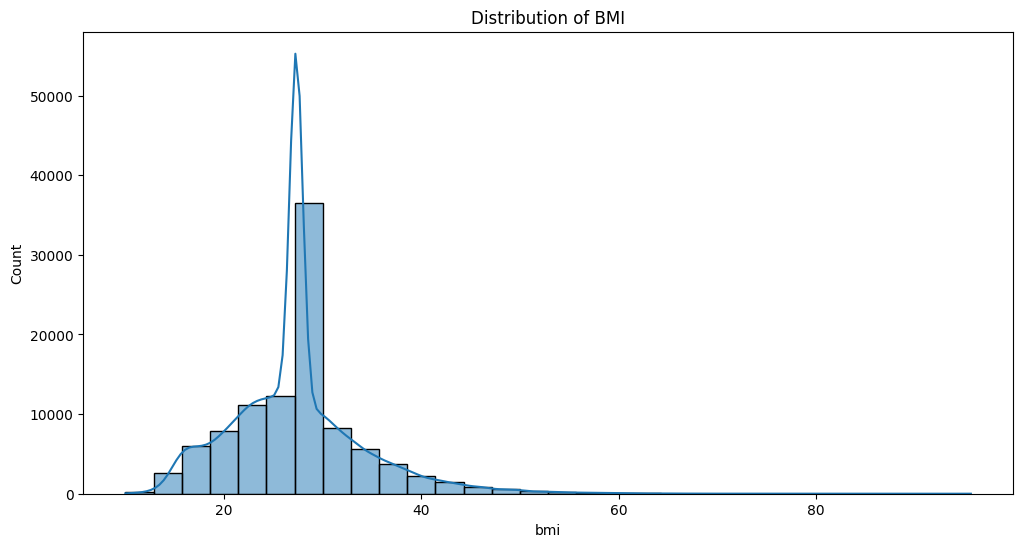

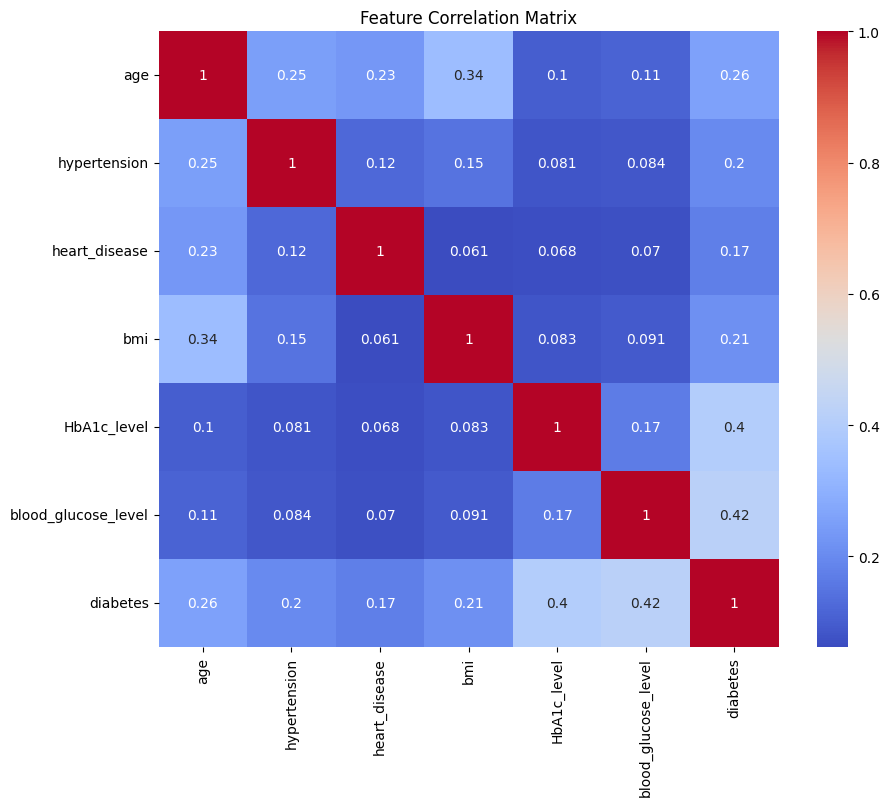

In [3]:
# Visualizing BMI Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# One-Hot Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Define Features & Target
X = df_encoded.drop(columns=['diabetes'])
y = df_encoded['diabetes']


In [5]:
# Select top 5 best features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Print selected features
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features)



Selected Features: Index(['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')


In [6]:
from sklearn.model_selection import train_test_split

# Split data into training & testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluate Logistic Regression
log_acc = accuracy_score(y_test, y_pred_log)
print("\n🔹 Logistic Regression Accuracy:", log_acc)



🔹 Logistic Regression Accuracy: 0.9588


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest (Optimized for Speed)
rf_optimized = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_optimized.fit(X_train[:20000], y_train[:20000])  # Use subset for faster training
y_pred_rf_opt = rf_optimized.predict(X_test)

# Evaluate Random Forest
rf_opt_acc = accuracy_score(y_test, y_pred_rf_opt)
rf_opt_report = classification_report(y_test, y_pred_rf_opt)

print("\n🔹 Random Forest Accuracy:", rf_opt_acc)
print("\n🔹 Classification Report (Random Forest):\n", rf_opt_report)



🔹 Random Forest Accuracy: 0.97225

🔹 Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



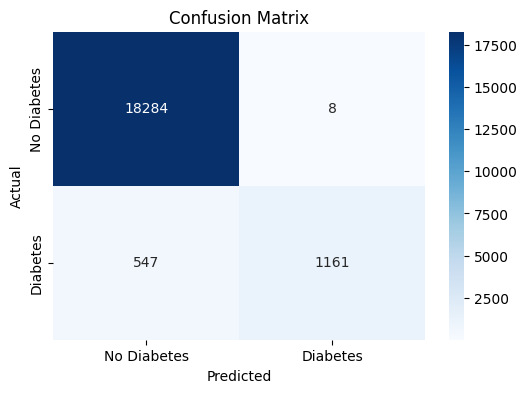

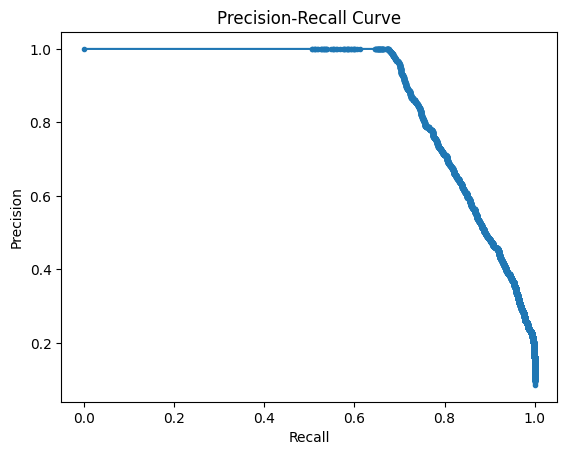

In [9]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_opt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_optimized.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [10]:
import pickle

# Save the trained model
pickle.dump(rf_optimized, open("diabetes_model.pkl", "wb"))

print("\n✅ Model Saved as 'diabetes_model.pkl'")



✅ Model Saved as 'diabetes_model.pkl'


In [11]:
files.download("diabetes_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
! pip install streamlit -q


In [19]:
!wget -q -O - ipv4.icanhazip.com

104.198.111.54


In [20]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.198.111.54:8501

⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://five-teams-listen.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: 